In [1]:
import pandas as pd


import pandas as pd
import matplotlib as plt

In [2]:
achivo="https://raw.githubusercontent.com/IgnacioPardo/Tecnologias_Exponenciales_2024/main/TP_Spotify/StreamingHistory_Extended.csv"
spoti=pd.read_csv(achivo)
spoti

C:\Users\Lgarb\AppData\Local\Temp\ipykernel_27052\3782388289.py:2: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  spoti=pd.read_csv(achivo)


,ts,username,platform,ms_played,conn_country,user_agent_decrypted,master_metadata_track_name,master_metadata_album_artist_name,master_metadata_album_album_name,spotify_track_uri,episode_name,episode_show_name,spotify_episode_uri,reason_start,reason_end,shuffle,skipped,offline,offline_timestamp,is_podcast
0,2020-12-06T02:51:11Z,11145402699,"iOS 14.2 (iPhone12,3)",145610,AR,unknown,Hey Jude - Remastered 2015,The Beatles,1,spotify:track:0aym2LBJBk9DAYuHHutrIl,NaN,NaN,NaN,trackdone,fwdbtn,True,NaN,False,1607222710755,False
1,2020-12-06T02:53:31Z,11145402699,"iOS 14.2 (iPhone12,3)",138692,AR,unknown,Hacer un puente,La Franela,Hacer Un Puente,spotify:track:18Q3WTfyWX1tdS1cp42NhA,NaN,NaN,NaN,fwdbtn,fwdbtn,True,NaN,False,1607223071185,False
2,2020-12-06T02:53:53Z,11145402699,"iOS 14.2 (iPhone12,3)",22662,AR,unknown,Happy Together - Remastered,The Turtles,All the Singles,spotify:track:2admbUc576sC6M0QeUkg2C,NaN,NaN,NaN,fwdbtn,fwdbtn,True,NaN,False,1607223210387,False
3,2020-12-06T02:53:56Z,11145402699,"iOS 14.2 (iPhone12,3)",2716,AR,unknown,Demons,Imagine Dragons,Night Visions,spotify:track:5qaEfEh1AtSdrdrByCP7qR,NaN,NaN,NaN,fwdbtn,fwdbtn,True,NaN,False,1607223233165,False
4,2020-12-06T02:53:57Z,11145402699,"iOS 14.2 (iPhone12,3)",116,AR,unknown,"Paint It, Black",The Rolling Stones,Aftermath,spotify:track:63T7DJ1AFDD6Bn8VzG6JE8,NaN,NaN,NaN,fwdbtn,fwdbtn,True,NaN,False,1607223236453,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125344,2018-10-05T22:44:53Z,11145402699,"iOS 12.0 (iPhone8,1)",1365,AR,unknown,Gente Que No Sabe Lo Que Quiere,Litto Nebbia,Solo Se Trata de Vivir / Solopiano Vol. 1,spotify:track:3u8sP95YHOsYwRQfms6kgc,NaN,NaN,NaN,fwdbtn,fwdbtn,False,NaN,False,1538779491211,False
125345,2018-10-05T22:44:54Z,11145402699,"iOS 12.0 (iPhone8,1)",1344,AR,unknown,11 Y 6,Fito Paez,Giros,spotify:track:2PkTjm1QAJCZbJ9MqC4RqA,NaN,NaN,NaN,fwdbtn,fwdbtn,False,NaN,False,1538779492740,False
125346,2018-10-05T22:44:55Z,11145402699,"iOS 12.0 (iPhone8,1)",832,AR,unknown,Mientes,Charly García,Tango 4,spotify:track:670dXRMKr9vVtGk01dYeSr,NaN,NaN,NaN,fwdbtn,fwdbtn,False,NaN,False,1538779494205,False
125347,2018-10-05T22:44:56Z,11145402699,"iOS 12.0 (iPhone8,1)",1194,AR,unknown,Apostar al Amor,Los Tipitos,Push,spotify:track:6PyBNCpOX5uOjKDNjNNgjq,NaN,NaN,NaN,fwdbtn,fwdbtn,False,NaN,False,1538779495059,False


In [3]:
#Analisis de las columnas, sus tipos de datos e importancia

spoti.columns
spoti.dtypes


ts                                   object
username                              int64
platform                             object
ms_played                             int64
conn_country                         object
user_agent_decrypted                 object
master_metadata_track_name           object
master_metadata_album_artist_name    object
master_metadata_album_album_name     object
spotify_track_uri                    object
episode_name                         object
episode_show_name                    object
spotify_episode_uri                  object
reason_start                         object
reason_end                           object
shuffle                                bool
skipped                              object
offline                                bool
offline_timestamp                     int64
is_podcast                             bool
dtype: object

In [4]:
#2.
#¿A partir de que fecha se registraron las reproducciones? ¿Hasta que fecha?
spoti["ts"]=pd.to_datetime(spoti["ts"])
spoti["ts"].min()
spoti["ts"].max()


Timestamp('2024-05-23 23:56:20+0000', tz='UTC')

In [5]:
#3.
#¿Cuántas canciones diferentes se escucharon en total?
cancionesUnicas=spoti["spotify_track_uri"].nunique()
print("la cantidad de canciones unicas es: ",cancionesUnicas)

la cantidad de canciones unicas es:  11556


In [6]:
#4.
#¿Cuánto es la duración total de las reproducciones de canciones registradas? 
#Pista: ¿Alguna columna del dataset indica la duración de la reproducción?
duracioncanciones=spoti["ms_played"].sum()
print("la duracion total de las canciones es: ",duracioncanciones)


la duracion total de las canciones es:  12583875841


In [7]:
#5. ¿Cuál es el artista más escuchado por tiempo total de reproducción?
artistaMasEscuchado=spoti.groupby("master_metadata_album_artist_name")[["ms_played"]].sum().sort_values("ms_played",ascending=False).head(1)
artistaMasEscuchado.index[0]
print("el artista mas escuchado es: ",artistaMasEscuchado.index[0])

el artista mas escuchado es:  Charly García


In [8]:
#6. ¿Cuál es la canción más escuchada por tiempo total de reproducción?
masescuchada=spoti.groupby('spotify_track_uri')['ms_played'].max().sort_values(ascending=False).head(10)

tiempocancionmas=masescuchada.sum()
nombrecancionmasescuchadaportiempodereproduccion=spoti[spoti['spotify_track_uri']==masescuchada.index[0]]["master_metadata_track_name"].head(1).iloc[0]
print("la cancion mas escuchada por tiempo total de reproduccion es: ",nombrecancionmasescuchadaportiempodereproduccion," y su tiempo de reproduccion es: ",tiempocancionmas,"segundos")

la cancion mas escuchada por tiempo total de reproduccion es:  wish you were gay  y su tiempo de reproduccion es:  10756818 segundos


In [9]:
#7. Del artista más escuchado (por tiempo reproducido), ¿cuál es la canción más escuchada?


artisasPorOrden = spoti.groupby("master_metadata_album_artist_name")[["ms_played"]].sum().sort_values("ms_played", ascending=False)
nombremasescuchado = artisasPorOrden.head(1).index[0]

cancionMas = spoti[spoti["master_metadata_album_artist_name"] == nombremasescuchado]
cancionMas = cancionMas.groupby("master_metadata_track_name")[["ms_played"]].sum().sort_values("ms_played", ascending=False).head(1)

cancionmasescuchadaportiemporeproducido=cancionMas.index[0]
print(cancionmasescuchadaportiemporeproducido,"de",nombremasescuchado)



Hablando a Tu Corazón de Charly García


<Axes: title={'center': 'Top 10 de artistas más escuchados'}, xlabel='Artistas', ylabel='Tiempo de reproducción en ms'>

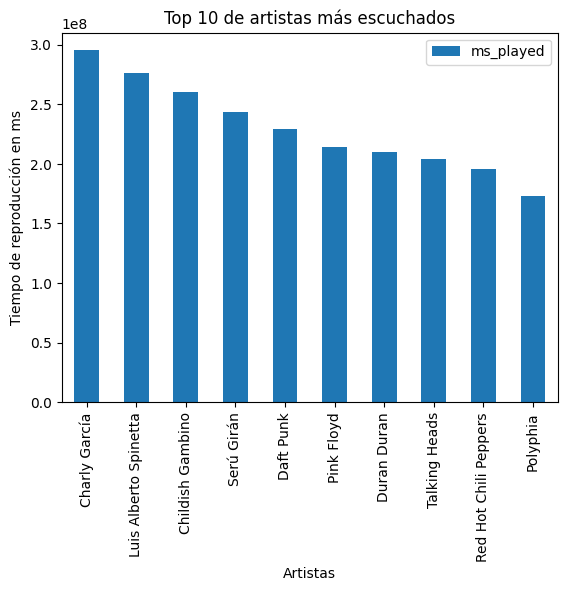

In [10]:
#8. Determinar el top 10 de artistas más escuchados . Elegir un tipo de gráfico adecuado para visualizar los resultados.
artisasPorOrden.head(10).plot(kind="bar",title="Top 10 de artistas más escuchados",xlabel="Artistas",ylabel="Tiempo de reproducción en ms")



<Axes: title={'center': 'Top 10 de canciones más escuchados'}, xlabel='Canciones', ylabel='Tiempo de reproducción\xa0en\xa0ms'>

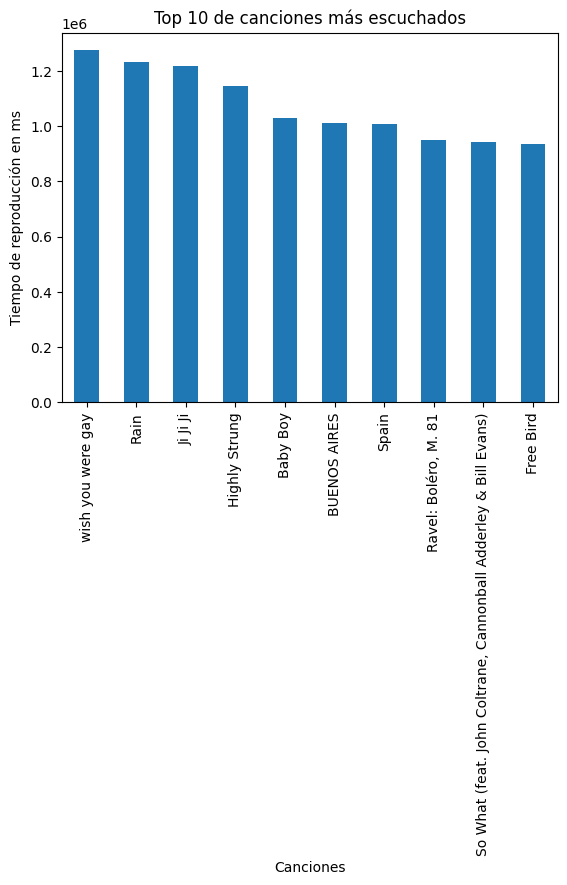

In [11]:
#9. Determinar el top 10 de canciones más escuchadas. Elegir un tipo de gráfico adecuado para visualizar los resultados.

ej9=spoti.groupby('master_metadata_track_name')['ms_played'].max().sort_values(ascending=False).head(10)
ej9.head(10).plot(kind="bar",title="Top 10 de canciones más escuchados",xlabel="Canciones",ylabel="Tiempo de reproducción en ms")

In [ ]:
#aca empiezan los bonuses.

In [12]:
#¿Cual es la canción mas veces salteada?
bonus1=spoti[['master_metadata_track_name','skipped']]
bonus1=bonus1[spoti['skipped']==True].dropna()
bonus1['master_metadata_track_name'].value_counts().idxmax()

'On The Sunny Side Of The Street'

In [13]:
import calendar
# ¿Cuál es el mes en el que más se escucha música?
mes = spoti["ts"].dt.month.value_counts().idxmax()
nombremes = calendar.month_name[mes]

print("el mes mas escuchado es",nombremes)

el mes mas escuchado es April


In [14]:
#¿Cuál es el artista que más se escucha en cada mes?

#version con documentacion
meses = spoti["ts"].dt.month
artistaMes = pd.concat([meses, spoti["master_metadata_album_artist_name"]], axis=1)  #artistas que se escucharon en cada mes
artistaMes = artistaMes.groupby("ts").agg(lambda x:x.value_counts().index[0])  #artista mas escuchado en cada mes
print(artistaMes)
print("\n\n")



#version con chatgpt
conteo_artistas = artistaMes.groupby(['ts', 'master_metadata_album_artist_name']).size() 
conteo_artistas = conteo_artistas.unstack(fill_value=0)
artista_mas_escuchado = conteo_artistas.idxmax(axis=1)
print(artista_mas_escuchado)

   master_metadata_album_artist_name
ts                                  
1              Red Hot Chili Peppers
2              Red Hot Chili Peppers
3              Red Hot Chili Peppers
4                        Duran Duran
5                   Childish Gambino
6              Luis Alberto Spinetta
7                           Polyphia
8              Luis Alberto Spinetta
9                      Charly García
10                     Charly García
11                        Pink Floyd
12                          Bizarrap



ts
1     Red Hot Chili Peppers
2     Red Hot Chili Peppers
3     Red Hot Chili Peppers
4               Duran Duran
5          Childish Gambino
6     Luis Alberto Spinetta
7                  Polyphia
8     Luis Alberto Spinetta
9             Charly García
10            Charly García
11               Pink Floyd
12                 Bizarrap
dtype: object


In [15]:
#¿Cuál es el día de la semana en el que más se escucha música? ¿Y el horario del día?
diaMas=spoti["ts"].dt.dayofweek.value_counts().idxmax()
horaMas=spoti["hora"]=spoti["ts"].dt.hour.value_counts().idxmax()
print("el dia de la semana en el que mas se escucha musica es: ",calendar.day_name[diaMas]," y el horario del dia es: ",horaMas,"horas")

el dia de la semana en el que mas se escucha musica es:  Saturday  y el horario del dia es:  22 horas
